<a href="https://colab.research.google.com/github/kaiquefreire05/stellar-classification-ml/blob/main/stellar_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

Na astronomia, a classificação estelar é a classificação das estrelas com base nas suas características espectrais. O esquema de classificação de galáxias, quasares e estrelas é um dos mais fundamentais da astronomia. A catalogação inicial de estrelas e sua distribuição no céu levou à compreensão de que elas constituem a nossa própria galáxia e, seguindo a distinção de que Andrômeda era uma galáxia separada da nossa, numerosas galáxias começaram a ser pesquisadas à medida que telescópios mais poderosos eram construídos. Este dataset visa classificar estrelas, galáxias e quasares com base em suas características espectrais.

# Conteúdo

Os dados consistem em 100.000 observações do espaço obtidas pelo SDSS (Sloan Digital Sky Survey). Cada observação é descrita por 17 colunas de características e 1 coluna de classe que a identifica como uma estrela, galáxia ou quasar.<br><br>

* `obj_ID:` Object Identifier, valor único que identifica o objeto no catálogo de imagens utilizado pelo CAS;
* `alpha:` Ângulo de ascensão reta (na época J2000);
* `delta:` Ângulo de declinação (na época J2000);
* `u:` Filtro ultravioleta no sistema fotométrico;
* `g:` Filtro verde no sistema fotométrico;
* `r:` Filtro vermelho no sistema fotométrico;
* `i:` Filtro infravermelho próximo no sistema fotométrico;
* `z:` Filtro infravermelho no sistema fotométrico;
* `run_ID:` Número de execução usado para identificar a verificação específica;
* `rereun_ID:` Número de nova execução para especificar como a imagem foi processada;
* `cam_col:` Coluna da câmera para identificar a linha de varredura na execução;
* `field_ID:` Número do campo para identificar cada campo;
* `spec_obj_ID:` ID exclusivo usado para objetos espectroscópicos ópticos (isso significa que 2 observações diferentes com o mesmo spec_obj_ID devem compartilhar a classe de saída);
* `class:` classe do objeto (objeto galáxia, estrela ou quasar);
* `redshift:` valor do redshift com base no aumento do comprimento de onda;
* `plate:` ID da placa, identifica cada placa no SDSS;
* `MJD:` Modified Julian Date, usada para indicar quando um determinado dado do SDSS foi obtido;
* `Fiber_ID:` ID da fibra que identifica a fibra que apontou a luz para o plano focal em cada observação.
<br><br>

# Importação das bibliotecas

In [ ]:
# Bibliotecas necessárias

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV # Validação cruzada dos dados
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Análise exploratória

In [ ]:
# Fazendo a leitura da base de dados

df = pd.read_csv('/content/drive/MyDrive/datasets/star_classification.csv')

In [ ]:
# Mostrando os 5 primeiros registros

df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
# Verificando nome das colunas

df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [ ]:
# Tamanho da base de dados

df.shape

(100000, 18)

In [ ]:
# Informações da base de dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
# Confirmando se realmente não existe valores nulos

df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [ ]:
# Verificando possíveis classificações

df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [ ]:
# Fazendo a contagem
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

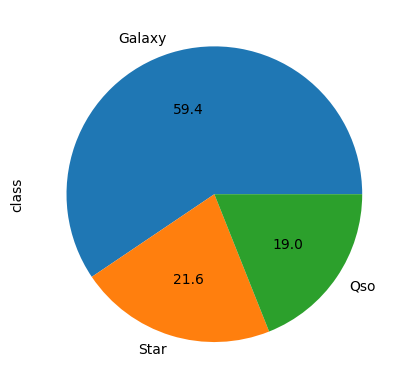

In [ ]:
# Plotando em gráfico de pizza

df['class'].value_counts().plot.pie(labels=['Galaxy', 'Star', 'Qso'], autopct="%1.1f");

# Divisão previsores e classe

In [ ]:
# Dividindo previsores e classe

x = df.drop(columns='class')
y = df['class']

In [ ]:
# 5 primeiros previsores
x.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0.116123,6121,56187,842


In [ ]:
# 5 primeiras classes
y.head()

0    GALAXY
1    GALAXY
2    GALAXY
3    GALAXY
4    GALAXY
Name: class, dtype: object

# Standard Scaler (Padronização)

In [ ]:
# Fazendo a padronização

scaler = StandardScaler()

x = scaler.fit_transform(x)

In [ ]:
x

array([[-0.44563362, -0.43460358,  0.42552871, ...,  0.22863291,
         0.42320321, -1.02134224],
       [ 0.01873981, -0.33992143,  0.36340227, ...,  1.79792394,
         1.42072864, -0.0818825 ],
       [-0.4456333 , -0.36725058,  0.58271274, ..., -0.19002535,
         0.00185377, -0.55161237],
       ...,
       [ 0.42381919,  0.48660555, -0.4293603 , ..., -0.80378648,
        -0.58261651, -1.37730941],
       [-0.42311121,  0.35895206,  1.14663054, ...,  0.54669125,
         0.43094454,  0.07591737],
       [-0.42311176,  0.19965373,  1.28938133, ...,  0.76990791,
         0.83791722,  1.47409769]])

# Divisão base de treino e teste

In [ ]:
# Dividindo entre bases de treino e teste

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(80000, 17) (80000,)
(20000, 17) (20000,)


# Função modelo para treino

In [ ]:
# Função de treino de modelo com Grid Search

def training_model(modelo, x_train, y_train, param_grad):
    """Trains a machine learning model using GridSearchCV and returns accuracy and the best parameters.
    Args:
        model: The machine learning model to be trained.
        x_train: The training data (features).
        y_train: The training labels (targets).
        param_grad: A dictionary containing the parameters to be tested with GridSearchCV.

    Returns:
        A dictionary containing:
            'accuracy': The best accuracy obtained during training.
            'parametros': The best parameters found by GridSearchCV.
    """
    gridsearch = GridSearchCV(estimator=modelo, param_grid=param_grad)
    gridsearch.fit(x_train, y_train)
    return {
      'accuracy': gridsearch.best_score_,
      'parametros': gridsearch.best_params_
    }

# Decision Tree

In [ ]:
# Decision Tree

# parâmetros
parametros_arvore = {'criterion': ['gini', 'entropy'],
                     'splitter': ['best', 'random'],
                     'min_samples_split': [2, 5, 10],
                     'min_samples_leaf': [1, 5, 10]
                     }
resultados = training_model(DecisionTreeClassifier(), x, y, parametros_arvore)
print('Melhor accuracy: ', resultados['accuracy'])
print('Melhores parâmetros:', resultados['parametros'])

Melhor accuracy:  0.9746400000000002
Melhores parâmetros: {'criterion': 'gini', 'min_samples_leaf': 10, 'min_samples_split': 10, 'splitter': 'best'}


In [ ]:
# Testando e visualizando Matriz de confusão

# criando o modelo
arvore_model = DecisionTreeClassifier(criterion='gini', min_samples_leaf=10, min_samples_split=10, splitter='best')
# fazendo treino com as variáveis de treino
arvore_model.fit(x_train, y_train)
# declarando em uma variável o resultado
resultados_arvore = arvore_model.predict(x_test)

In [ ]:
# Verificando accuracy

print(f'O accuracy foi de: {accuracy_score(y_test, resultados_arvore)}')

O accuracy foi de: 0.97365


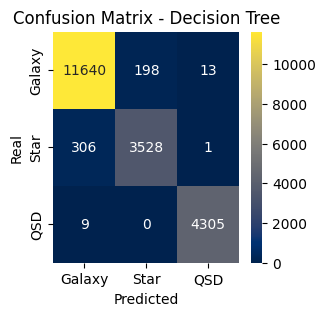

In [ ]:
# Gerando matriz de confusão

confuse_tree = confusion_matrix(y_test, resultados_arvore)

tags = ["Galaxy", "Star", "QSD"]

plt.figure(figsize=(3, 3))
sns.heatmap(confuse_tree, annot=True, fmt='d', cmap='cividis', xticklabels=tags, yticklabels=tags)
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [ ]:
# Gerando tabela de classificação

print(classification_report(y_test, resultados_arvore))

              precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.98     11851
         QSO       0.95      0.92      0.93      3835
        STAR       1.00      1.00      1.00      4314

    accuracy                           0.97     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000



# K-Nearest Neighbors (KNN)

In [ ]:
# Função que retorna acurácia do algoritmo com vários valores de K

def test_k_values(x_train, y_train, x_test, y_test, qtde_k):
    """Iteratively tests different K values for a KNN classifier and prints the accuracy for each value.
    Args:
        x_train (numpy.ndarray): Training features.
        y_train (numpy.ndarray): Training labels.
        x_test (numpy.ndarray): Testing features.
        y_test (numpy.ndarray): Testing labels.
        qtde_k (int): Maximum number of K values to test.
    Returns:
        None
    """
    for i in range(1, qtde_k):
       knn_model = KNeighborsClassifier(n_neighbors=i) # cria modelo  com qtde i de K
       knn_model.fit(x_train, y_train) # treina com as variáveis de treino

       resultados_knn = knn_model.predict(x_test) # predict

       accuracy_knn = accuracy_score(y_test, resultados_knn) # obtém accuracy

       print(f'Value of K: {i}, Accuracy: {accuracy_knn}')

In [ ]:
# Verificando a melhor quantidade de K

test_k_values(x_train, y_train, x_test, y_test, 26)

Value of K: 1, Accuracy: 0.8938
Value of K: 2, Accuracy: 0.88005
Value of K: 3, Accuracy: 0.9009
Value of K: 4, Accuracy: 0.8889
Value of K: 5, Accuracy: 0.8978
Value of K: 6, Accuracy: 0.8882
Value of K: 7, Accuracy: 0.89505
Value of K: 8, Accuracy: 0.88705
Value of K: 9, Accuracy: 0.89095
Value of K: 10, Accuracy: 0.8846
Value of K: 11, Accuracy: 0.88795
Value of K: 12, Accuracy: 0.88135
Value of K: 13, Accuracy: 0.88585
Value of K: 14, Accuracy: 0.881
Value of K: 15, Accuracy: 0.88375
Value of K: 16, Accuracy: 0.8795
Value of K: 17, Accuracy: 0.8814
Value of K: 18, Accuracy: 0.87705
Value of K: 19, Accuracy: 0.8797
Value of K: 20, Accuracy: 0.8757
Value of K: 21, Accuracy: 0.8772
Value of K: 22, Accuracy: 0.87335
Value of K: 23, Accuracy: 0.87345
Value of K: 24, Accuracy: 0.87175
Value of K: 25, Accuracy: 0.87205


In [ ]:
# Criando modelo KNN

knn_model = KNeighborsClassifier(n_neighbors=3) # 3 neighbors, pois foi a melhor accuracy dos testes
# fazendo treino com as variáveis de treino
knn_model.fit(x_train, y_train)
# armazenando em uma variável as previsões
previsoes_knn = knn_model.predict(x_test)

In [ ]:
previsoes_knn

array(['GALAXY', 'GALAXY', 'GALAXY', ..., 'GALAXY', 'GALAXY', 'STAR'],
      dtype=object)

In [ ]:
print(f'O accuracy foi de: {accuracy_score(y_test, previsoes_knn)}')

O accuracy foi de: 0.9009


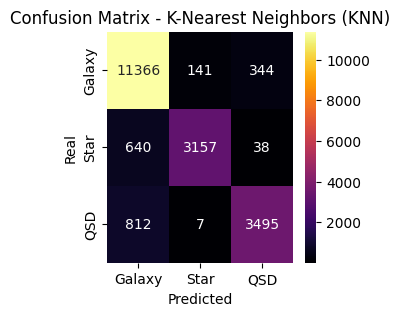

In [ ]:
# Gerando matriz de confusão

confuse_knn = confusion_matrix(y_test, previsoes_knn) # criando matriz de confusão utilizando o import

tags = ["Galaxy", "Star", "QSD"] # resultados possíveis

plt.figure(figsize=(3, 3))
sns.heatmap(confuse_knn, annot=True, fmt='d', cmap='inferno', xticklabels=tags, yticklabels=tags)
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix - K-Nearest Neighbors (KNN)')
plt.show()

In [ ]:
# Tabela de classificação

print(classification_report(y_test, previsoes_knn))

              precision    recall  f1-score   support

      GALAXY       0.89      0.96      0.92     11851
         QSO       0.96      0.82      0.88      3835
        STAR       0.90      0.81      0.85      4314

    accuracy                           0.90     20000
   macro avg       0.91      0.86      0.89     20000
weighted avg       0.90      0.90      0.90     20000



# Support Vector Machines (SVMs)

In [ ]:
# Verificando melhores parâmetros usando a função "training_model" com GridSearchCV

# parâmetros que serão testados
parametros_svm = {
                    'C': [1.0, 1.5, 2.0],
                    'kernel': ['rbf']
                 }

melhores_resultados = training_model(SVC(), x_train, y_train, parametros_svm)
print('Melhor accuracy: ', melhores_resultados['accuracy'])
print('Melhores parâmetros:', melhores_resultados['parametros'])

Melhor accuracy:  0.9604000000000001
Melhores parâmetros: {'C': 2.0, 'kernel': 'rbf'}


In [ ]:
svm_model = SVC(C= 2.0, kernel= 'rbf', random_state= 1)
svm_model.fit(x_train, y_train)
resultados_svm = svm_model.predict(x_test)

In [ ]:
resultados_svm

array(['GALAXY', 'QSO', 'GALAXY', ..., 'GALAXY', 'GALAXY', 'STAR'],
      dtype=object)

In [ ]:
print(f'O accuracy foi de: {accuracy_score(y_test, resultados_svm)}')

O accuracy foi de: 0.96035


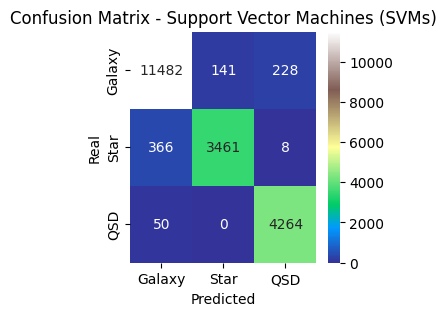

In [ ]:
# Gerando matriz de confusão

confuse_svm = confusion_matrix(y_test, resultados_svm) # criando matriz de confusão utilizando o import

tags = ["Galaxy", "Star", "QSD"] # resultados possíveis

plt.figure(figsize=(3, 3))
sns.heatmap(confuse_svm, annot=True, fmt='d', cmap='terrain', xticklabels=tags, yticklabels=tags)
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix - Support Vector Machines (SVMs)')
plt.show()

# Regressão logística

In [ ]:
logistic_model = LogisticRegression(random_state=1)
logistic_model.fit(x_train, y_train)
resultados_logistic = logistic_model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
resultados_logistic

array(['GALAXY', 'QSO', 'GALAXY', ..., 'GALAXY', 'GALAXY', 'STAR'],
      dtype=object)

In [ ]:
print(f'O accuracy foi de: {accuracy_score(y_test, resultados_logistic)}')

O accuracy foi de: 0.95445


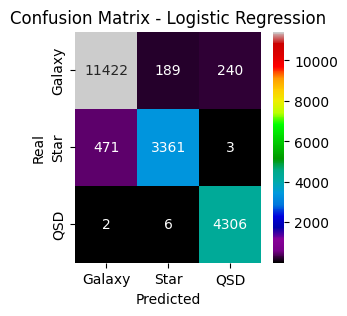

In [ ]:
# Gerando matriz de confusão

confuse_logistic = confusion_matrix(y_test, resultados_logistic) # criando matriz de confusão utilizando o import

tags = ["Galaxy", "Star", "QSD"] # resultados possíveis

plt.figure(figsize=(3, 3))
sns.heatmap(confuse_logistic, annot=True, fmt='d', cmap='nipy_spectral', xticklabels=tags, yticklabels=tags)
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Conclusão dos testes

Os testes realizados com os quatro modelos de classificação apresentados demonstraram que a Decision Tree é o modelo com o melhor desempenho geral, com accuracy de 97,36%. Esse resultado foi obtido após a otimização dos parâmetros do modelo, utilizando a técnica de GridSearchCV.

A Support Vector Machine (SVM) também obteve excelente desempenho, com accuracy de 96,04%. No entanto, esse modelo é mais complexo e requer um maior esforço de interpretação.

O K-Nearest Neighbors (KNN) alcançou um bom desempenho, com accuracy de 90,09%. Esse modelo é simples e fácil de implementar, mas pode ser suscetível a overfitting.

A Regressão Logística obteve um desempenho razoável, com accuracy de 95,45%. No entanto, o modelo encontrou um problema de convergência durante o treinamento, que precisa ser investigado.

# Considerações Importantes:

A análise das matrizes de confusão forneceu insights valiosos sobre a distribuição dos erros de classificação para cada modelo. A Decision Tree apresentou uma boa distribuição dos erros de classificação entre as classes, enquanto a Regressão Logística apresentou um maior número de erros de classificação para a classe QSO.

A Decision Tree se destaca pela facilidade de interpretação, permitindo a compreensão das regras de decisão aprendidas pelo modelo.

É importante avaliar o risco de overfitting, especialmente para modelos como Decision Tree e SVM. Técnicas de regularização podem ser utilizadas para mitigar esse problema.

**Autor: ** Kaíque Freire dos Santos<br>
**Link da base de dados: ** [stellar-classification-dataset](https://https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17/data)<br>
**Data: ** [30/01/2024]